In [1]:
import os
import requests
import pandas as pd

LOCATION = "../data/python_dev_survey.csv"

def download_file_from_google_drive():
    file_id = '1roodP07AhK1-oM3d9jcr8ffnhQO8spdn'
    URL = "https://docs.google.com/uc?export=download"
    print("Downloading file")
    return requests.get(URL, params = { 'id' : file_id }, stream = True)

def save_response_content(response):
    CHUNK_SIZE = 32768
    data_path = "../data"
    if not os.path.exists(data_path):
        os.mkdir(data_path)
    print("Writing file")
    with open(LOCATION, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

res = download_file_from_google_drive()
save_response_content(res)
print("Done")

df = pd.read_csv(LOCATION).set_index("response_id")
df.head(10)

Writing file
Done


,Is Python the main language you use for your current projects?,Bash / Shell:What other language(s) do you use?,C/C++:What other language(s) do you use?,C#:What other language(s) do you use?,Clojure:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,Go:What other language(s) do you use?,Groovy:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Java:What other language(s) do you use?,...,Product manager:Which of the following best describes your job role(s)?,QA engineer:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Technical support:Which of the following best describes your job role(s)?,Technical writer:Which of the following best describes your job role(s)?,Which of the following industries best describes your company's business?,Which of the following industries do you develop for?,Could you tell us your age range?,What country do you live in?
response_id,,,,,,,,,,,,,,,,,,,,,
10,Yes,Bash / Shell,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology / Software Development,Information Technology / Software Development,30–39,Canada
100,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Banking / Real Estate / Mortgage Financing,NaN,30–39,United States
1000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology / Software Development,Information Technology / Software Development,21–29,United States
10000,Yes,Bash / Shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,"No, I use Python as a secondary language",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,Other,NaN,30–39,Poland
10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
cols = [
    'Is Python the main language you use for your current projects?', 
    'How long have you been programming in Python?', 
    'How many years of professional coding experience do you have?', 
    'For what purposes do you mainly use Python?', 
    'Data analysis: What do you use Python for?', 
    'Machine learning: What do you use Python for?', 
    'Data analysis:To what extent are you involved in the following activities?', 
    'Machine learning:To what extent are you involved in the following activities?', 
    'What do you use Python for the most?', 
    'What is your employment status?', 
    'Could you tell us your age range?', 
    'What country do you live in?'
]

new_df = df[cols].copy().dropna(how="all")
new_df.head(10)

,Is Python the main language you use for your current projects?,How long have you been programming in Python?,How many years of professional coding experience do you have?,For what purposes do you mainly use Python?,Data analysis: What do you use Python for?,Machine learning: What do you use Python for?,Data analysis:To what extent are you involved in the following activities?,Machine learning:To what extent are you involved in the following activities?,What do you use Python for the most?,What is your employment status?,Could you tell us your age range?,What country do you live in?
response_id,,,,,,,,,,,,
10,Yes,6–10 years,11+ years,Both for work and personal,NaN,NaN,NaN,NaN,Web development,Fully employed by a company / organization,30–39,Canada
100,Yes,3–5 years,1–2 years,For work,NaN,NaN,NaN,NaN,NaN,Fully employed by a company / organization,30–39,United States
1000,Yes,3–5 years,3–5 years,Both for work and personal,Data analysis,Machine learning,secondary activity,primary activity,Machine learning,Fully employed by a company / organization,21–29,United States
10000,Yes,1–2 years,Less than 1 year,"For personal, educational or side projects",Data analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,"No, I use Python as a secondary language",3–5 years,1–2 years,"For personal, educational or side projects",Data analysis,NaN,secondary activity,NaN,NaN,NaN,NaN,NaN
10004,Yes,11+ years,6–10 years,Both for work and personal,NaN,NaN,NaN,NaN,Web development,Self-employed <em>(a person earning income dir...,30–39,Poland
10008,Yes,3–5 years,6–10 years,Both for work and personal,Data analysis,NaN,hobby,NaN,DevOps / System administration / Writing autom...,Fully employed by a company / organization,40–49,United States
1001,Yes,3–5 years,11+ years,For work,Data analysis,NaN,primary activity,NaN,Data analysis,NaN,NaN,NaN
10010,Yes,3–5 years,6–10 years,Both for work and personal,Data analysis,NaN,secondary activity,NaN,Data analysis,Fully employed by a company / organization,40–49,United States


In [3]:
import functools as ft

cleaned = pd.DataFrame(index=["response_id"])

picked = ["Data analysis", "Machine learning"]
chosen_mask = ft.reduce(
    lambda a, b: a | (new_df[f"{b}: What do you use Python for?"].notna()), 
    picked, 
    False
)
activity_mask = ft.reduce(
    lambda a, b: a | (
        new_df[f"{b}:To what extent are you involved in the following activities?"]
            .str.contains("primary|secondary", na=False, regex=True)
    ), 
    picked, 
    False
)
purpose_mask = (
    new_df["For what purposes do you mainly use Python?"]
        .str.contains("work", na=False, regex=True)
)

cleaned = new_df[chosen_mask & activity_mask & purpose_mask]
cleaned

,Is Python the main language you use for your current projects?,How long have you been programming in Python?,How many years of professional coding experience do you have?,For what purposes do you mainly use Python?,Data analysis: What do you use Python for?,Machine learning: What do you use Python for?,Data analysis:To what extent are you involved in the following activities?,Machine learning:To what extent are you involved in the following activities?,What do you use Python for the most?,What is your employment status?,Could you tell us your age range?,What country do you live in?
response_id,,,,,,,,,,,,
1000,Yes,3–5 years,3–5 years,Both for work and personal,Data analysis,Machine learning,secondary activity,primary activity,Machine learning,Fully employed by a company / organization,21–29,United States
1001,Yes,3–5 years,11+ years,For work,Data analysis,NaN,primary activity,NaN,Data analysis,NaN,NaN,NaN
10010,Yes,3–5 years,6–10 years,Both for work and personal,Data analysis,NaN,secondary activity,NaN,Data analysis,Fully employed by a company / organization,40–49,United States
10017,Yes,11+ years,11+ years,Both for work and personal,Data analysis,Machine learning,primary activity,primary activity,Machine learning,Fully employed by a company / organization,50–59,United States
10019,Yes,1–2 years,11+ years,Both for work and personal,Data analysis,Machine learning,primary activity,secondary activity,Data analysis,Fully employed by a company / organization,50–59,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...
9985,Yes,3–5 years,6–10 years,Both for work and personal,Data analysis,Machine learning,primary activity,primary activity,Machine learning,Fully employed by a company / organization,30–39,Czech Republic
9986,Yes,1–2 years,3–5 years,Both for work and personal,Data analysis,Machine learning,secondary activity,primary activity,Machine learning,Fully employed by a company / organization,21–29,Armenia
999,"No, I use Python as a secondary language",11+ years,11+ years,For work,NaN,Machine learning,NaN,primary activity,Machine learning,Fully employed by a company / organization,30–39,Finland


In [4]:
from matplotlib import pyplot as plt 

def age_grouper(idx):
    older = ["30–39", "40–49", "50–59", "60 or older"]
    return "Above Age 30" if idx in older else "Below Age 30"

def value_counter(series):
    return (
        series
          .value_counts(normalize=True)
          .map(lambda x: x * 100)
          .sort_index()
    )

def get_subplots():
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    ax1.set_yticks([])
    ax1.set_ylabel('Developer %')
    ax1.set_title('Developers by Age Ranges', fontsize=14)
    ax2.set_title('Developers Above or Below 30', fontsize=14)

    return ax1, ax2

def set_values_in_bars(axis_list):
    for ax in axis_list:
        for patch in ax.patches:
            height = patch.get_height()
            ax.annotate(
                "{:,.2f}".format(height),
                xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12
            )
            

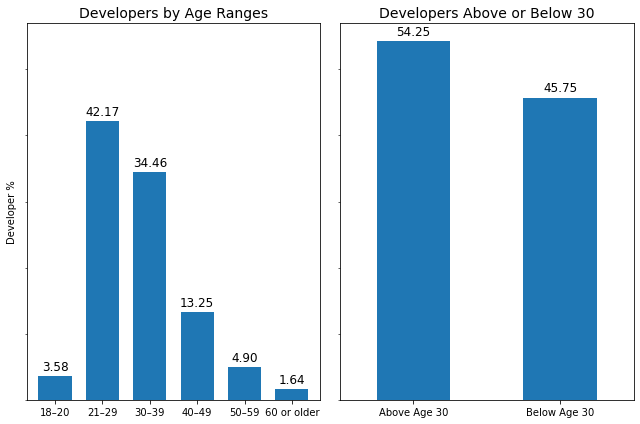

In [5]:
%matplotlib inline

axis1, axis2 = get_subplots()
counts = value_counter(cleaned['Could you tell us your age range?'])

counts.plot(kind="bar", rot=0, ax=axis1, width = 0.7)
counts.groupby(age_grouper).sum().plot.bar(rot=0, ax=axis2, figsize=(9, 6))
set_values_in_bars([axis1, axis2])
fig = axis1.get_figure()
fig.tight_layout()



Total number of countries:  91
Total devs:  11114


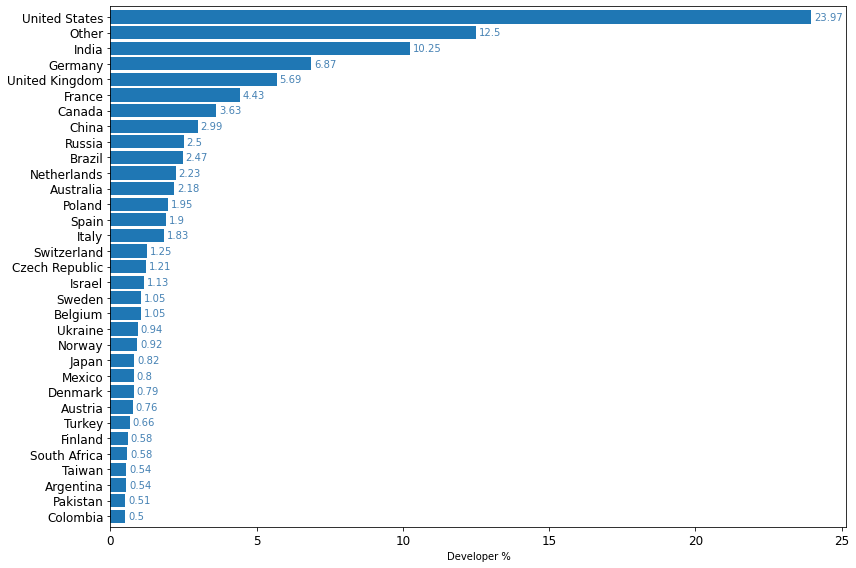

In [6]:

countries = cleaned['What country do you live in?']
country_counts = value_counter(countries)

grouped_countries = country_counts[country_counts < 0.5].index.values
grouped_counts = (
    country_counts
      .groupby(lambda idx: idx if idx not in grouped_countries else "Other")
      .agg('sum')
      .sort_values()
)

axis = grouped_counts.plot.barh(figsize=(12, 8), width = 0.85, fontsize=12)
axis.set_xlabel('Developer %')
fig = axis.get_figure()

print("Total number of countries: ", len(countries.value_counts()))
print("Total devs: ", countries.value_counts().sum())

for i, v in enumerate(grouped_counts):
    plt.text(v + 0.1, i, str(round(v, 2)), color='steelblue', va="center")
fig.tight_layout()

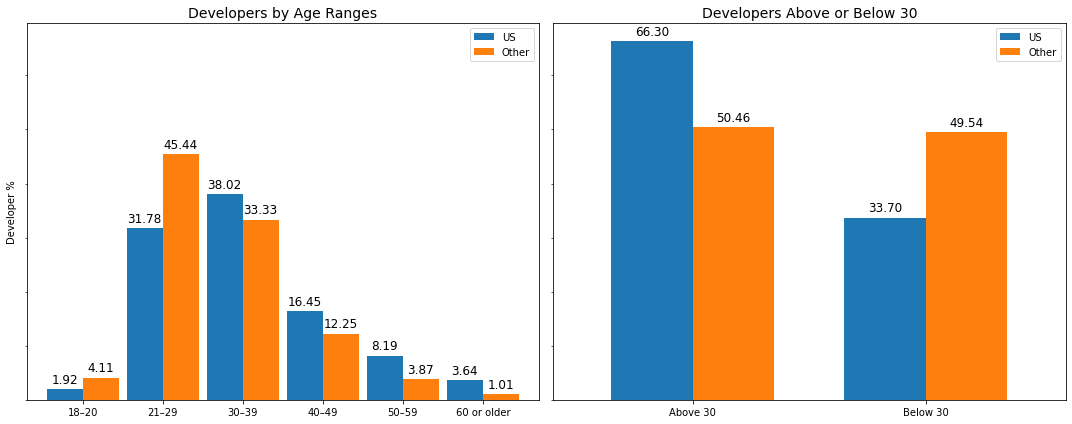

In [7]:
us = cleaned[cleaned["What country do you live in?"] == "United States"]
rest = cleaned[cleaned["What country do you live in?"] != "United States"]
us_counts = value_counter(us['Could you tell us your age range?'])
rest_counts = value_counter(rest['Could you tell us your age range?'])

axis1, axis2 = get_subplots()
ranges_df = pd.DataFrame({"US": us_counts.values, "Other": rest_counts.values}, index=us_counts.index)
ranges_df.plot.bar(rot=0, ax=axis1, width=0.9)

sum_df = pd.DataFrame(
    {
        "US": us_counts.groupby(age_grouper).sum().values, 
        "Other": rest_counts.groupby(age_grouper).sum().values
    }, 
    index=["Above 30", "Below 30"]
)
sum_df.plot.bar(rot=0, ax=axis2, width = 0.7, figsize=(15, 6))

set_values_in_bars([axis1, axis2])
fig = axis1.get_figure()
fig.tight_layout()
